Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [1]:
from sympy import *
from sympy.abc import x
y=trigsimp(((sin(x)/2)+(cos(x)/2))**2*sin(x))
y

sin(x)*sin(x + pi/4)**2/2

1.Определить корни

In [3]:
x_if_y_null=solveset(y,x)
x_if_y_null

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Из поиска корней видно, что период функции равен 2∏ ,поэтому всё что мы найдём будет повторяться с шагом в 2∏

2.Найти интервалы, на которых функция возрастает

In [6]:
x_diff_y_in_intelval=sorted(solveset(diff(y,x),x,domain=Interval(0,2*pi)))
# x_diff_y_in_intelval - список из x координат, в которых y' =0(y' - производная)
# ищем точки,где максимальное значение на положительном периоде(точки экстремума -перегиба графика)
div_arr=[]
# div_arr - список разниц координат x,где y'=0
for i in range (0,len(x_diff_y_in_intelval)):
    div=simplify(x_diff_y_in_intelval[i]-x_diff_y_in_intelval[i-1])
    div_arr.append(div)
min_div=min(div_arr)
min_div
    #  min_div- значение минимума из списка разниц между элементами div_arr
    #  min_div - используется,чтобы не выйти за пределы интервала между элементами x_diff_y_in_intelval
for i in range(1,100):
    if 1/(10**i)< min_div:
        div=1/(10**i)
        break
for i in range (0,len(x_diff_y_in_intelval)): 
    if y.subs(x,x_diff_y_in_intelval[i])> y.subs(x,x_diff_y_in_intelval[i] + div):
        print(f'Функция возрастает на отрезке: [{simplify(x_diff_y_in_intelval[i-1])};{simplify(x_diff_y_in_intelval[i])}]')
    else:
        continue
            



Функция возрастает на отрезке: [-atan(9/8 - sqrt(17)/8)/2 + 2*pi;atan(1/tan(atan(sqrt(17)/8 + 9/8)/2))]
Функция возрастает на отрезке: [3*pi/4;pi - atan(9/8 - sqrt(17)/8)/2]
Функция возрастает на отрезке: [-atan(sqrt(17)/8 + 9/8)/2 + 3*pi/2;7*pi/4]


3.Найти интервалы, на которых функция убывает

In [7]:
for i in range (0,len(x_diff_y_in_intelval)): 
    if y.subs(x,x_diff_y_in_intelval[i])< y.subs(x,x_diff_y_in_intelval[i] + div):
        print(f'Функция возрастает на отрезке: [{simplify(x_diff_y_in_intelval[i-1])};{simplify(x_diff_y_in_intelval[i])}]')
    else:
        continue

Функция возрастает на отрезке: [atan(1/tan(atan(sqrt(17)/8 + 9/8)/2));3*pi/4]
Функция возрастает на отрезке: [pi - atan(9/8 - sqrt(17)/8)/2;-atan(sqrt(17)/8 + 9/8)/2 + 3*pi/2]
Функция возрастает на отрезке: [7*pi/4;-atan(9/8 - sqrt(17)/8)/2 + 2*pi]


4.Построить график

Построим график на минимальном положительном периоде, а также на миниальном двойном положительном периоде(демонстрация 
повторения графика на интервале 2∏)

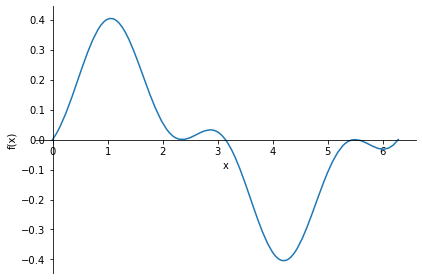

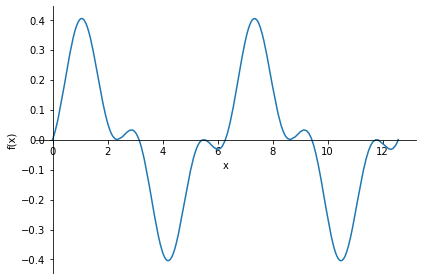

In [8]:
min_graf=plot(y,(x,0,2*pi))# график на минимальном положительном периоде
min_graf=plot(y,(x,0,4*pi))# график на двойном минимальном положительном периоде

5.Вычислить вершину

In [9]:
min_max=solveset(diff(y,x),x,domain=Interval(0,2*pi))
min_max=list(min_max)
y_arr=[]
x_arr=[]
for i in range(0,len(min_max)):
    x_arr.append(simplify(min_max[i]))
    y_arr.append(y.subs(x,simplify(min_max[i])))
max_y_index=y_arr.index(max(y_arr))
print('Вершина периода 2∏ имеет координаты :\n')
print(f'x - координата: {x_arr[max_y_index]}\n')
print(f'y - координата: {y_arr[max_y_index]}\n')

Вершина периода 2∏ имеет координаты :

x - координата: atan(1/tan(atan(sqrt(17)/8 + 9/8)/2))

y - координата: sin(pi/4 + atan(1/tan(atan(sqrt(17)/8 + 9/8)/2)))**2/(2*sqrt(1 + tan(atan(sqrt(17)/8 + 9/8)/2)**(-2))*tan(atan(sqrt(17)/8 + 9/8)/2))



6.Определить промежутки, на котором f>0

In [16]:
solve_univariate_inequality(y>0,x,relational=False,domain=Interval(0,2*pi))

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

7.Определить промежутки, на котором f<0

In [17]:
solve_univariate_inequality(y<0,x,relational=False,domain=Interval(0,2*pi))

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))